# Analyze local correction
## and improvement from global correction only

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc4


import src.utils.tardisml_utils as tardisml_utils
rootdir = tardisml_utils.get_rootdir()

/LUMI_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/scipy/__init__.py:143: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# ---------------------------------------
#            Load sea ice age
# ---------------------------------------

# check MYI or FYI in cluster

# > use MYI and FYI for clustering ?

# idir = '/nird/projects/nird/NS2993K/Leo/results/xgb_230118-135014/ml/'
idir = f'{rootdir}/Leo/sia/'
ifile = 'Topaz_arctic25km_sea_ice_age_v2p0_20111001_20191231.nc'


nc = nc4.Dataset(f'{idir}{ifile}', mode='r')
sia = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['sia']  # upside down when plot but indexes correct
# fyi = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['fyi']

In [16]:
# ---------------------------------------
#         Local prediction
# ---------------------------------------

# load .nc


# idir = '/nird/projects/nird/NS2993K/Leo/results/xgb_230118-135014/ml/'
# idir = f'{rootdir}/Leo/results/local_prediction/'
# ifile = f'ypred_local_LSTM_allclusters.nc'

idir = f'{rootdir}/Leo/results/lstm_230302-213925/ml/'
ifile = f'biasSIT_local_LSTM_loc.nc'



nc = nc4.Dataset(f'{idir}{ifile}', mode='r')
ypred = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['ypred']*100
ytrue = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['ytrue']


In [4]:
ntest = 602

In [17]:
# compute rmse, correlation and bias for test period for all points
# in each cluster

cr = xr.corr(ypred.isel(time=slice(None,ntest)), ytrue.isel(time=slice(None,ntest)), dim=('time'))
                          
bias = ypred.isel(time=slice(None,ntest)) - ytrue.isel(time=slice(None,ntest))
                                                      
                                                      
rmse = np.sqrt((np.square(ypred.isel(time=slice(None,ntest))-
                                            ytrue.isel(time=slice(None,ntest)))).mean(dim='time'))

/LUMI_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/LUMI_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


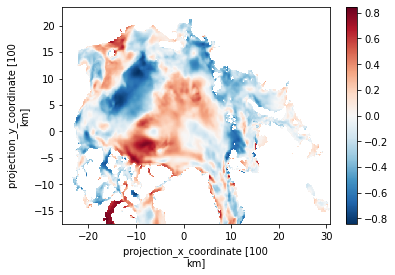

In [18]:
cr.plot()

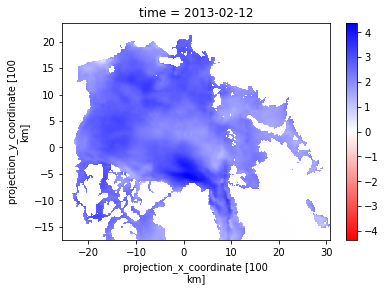

In [19]:
bias.isel(time=500).plot(cmap=plt.cm.get_cmap('bwr_r'))

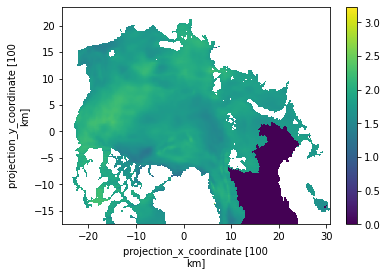

In [20]:
rmse.plot()

In [ ]:
# distribution of correlation inside each cluster
dico_violon = {}

dico_violon_rmse = {}

dico_violon_bias = {}

In [198]:
max_clusters = int(km.max())
for ncl in range(max_clusters):
    dico_violon[ncl] = cr.where(km==ncl).data[~np.isnan(cr.where(km==ncl))]
    dico_violon_rmse[ncl] = rmse.where(km==ncl).data[~np.isnan(rmse.where(km==ncl))]
    dico_violon_bias[ncl] = bias.where(km==ncl).data[~np.isnan(bias.where(km==ncl))]
    
    
# for violin plot

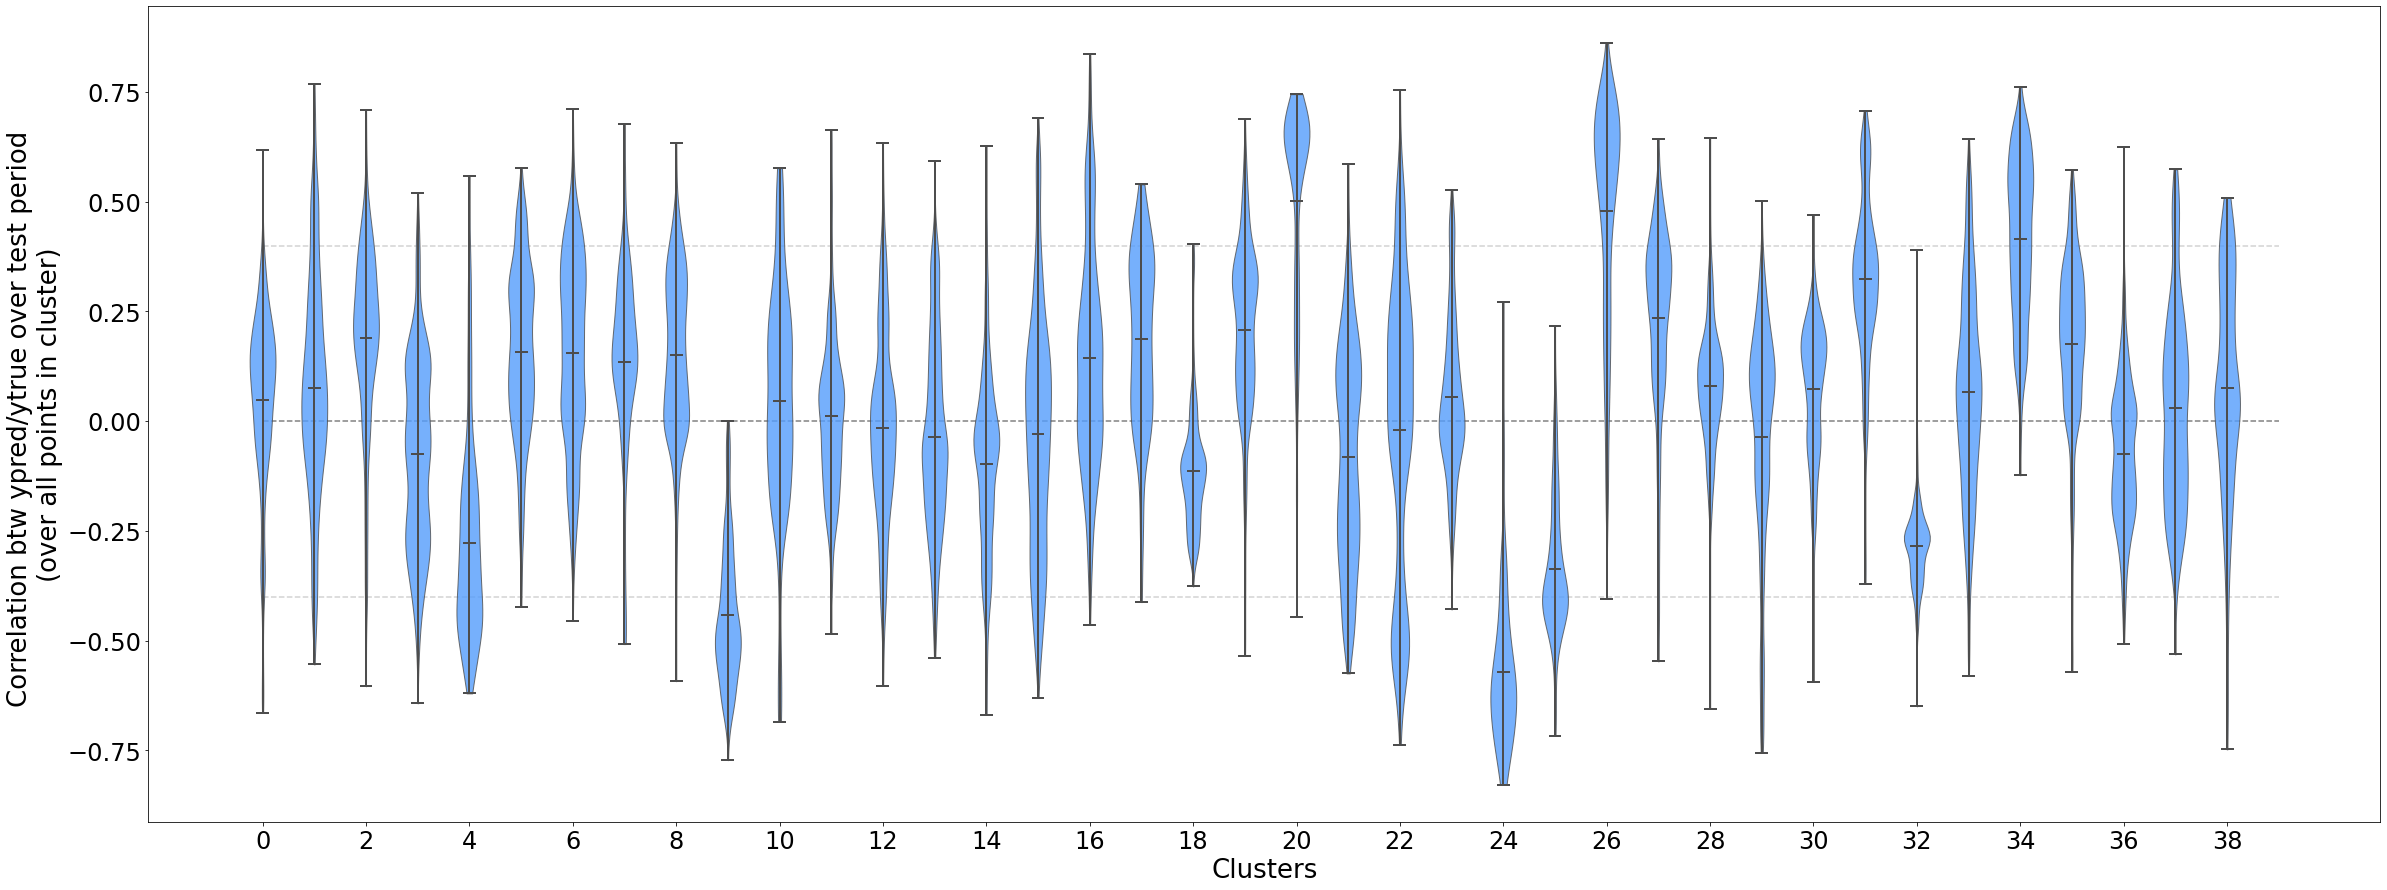

In [191]:

# def draw_violins():

fig, ax = plt.subplots(figsize=(40,15))

violons_parts = {}

for d_idx in range(max_clusters):
    violons_parts[d_idx] = plt.violinplot(dico_violon[d_idx], [int(d_idx)], showmedians=False, showmeans=True)
    
    
plt.hlines(0, 0, max_clusters, ls='--',color='grey', zorder=-10)
plt.hlines(.4, 0, max_clusters, ls='--',color='lightgrey', zorder=-10)
plt.hlines(-.4, 0, max_clusters, ls='--',color='lightgrey', zorder=-10)

ax.set_xlabel('Clusters')
ax.set_ylabel('Correlation btw ypred/ytrue over test period \n(over all points in cluster)')

ax.set_xticks(np.arange(0, max_clusters, 2))

orange = '#F2684C'
blue = '#549DFC'  # '#2F2079' # '#674BF1'  # #4BD6F1'  # 09306B'
grey = '#4D4D4D'

# modify colors of violons
for d_idx in range(max_clusters):
    for partname in ('cbars','cmins','cmaxes','cmeans'):
        vp = violons_parts[d_idx][partname]
        vp.set_edgecolor(grey)
        vp.set_linewidth(2)
    for vp in violons_parts[d_idx]['bodies']:
        vp.set_facecolor(blue)
        vp.set_edgecolor(grey)
       # vp.set_linewidth(1)
        vp.set_alpha(.8)
        
        
modif_plot.resize(fig, s=24, rx=0)


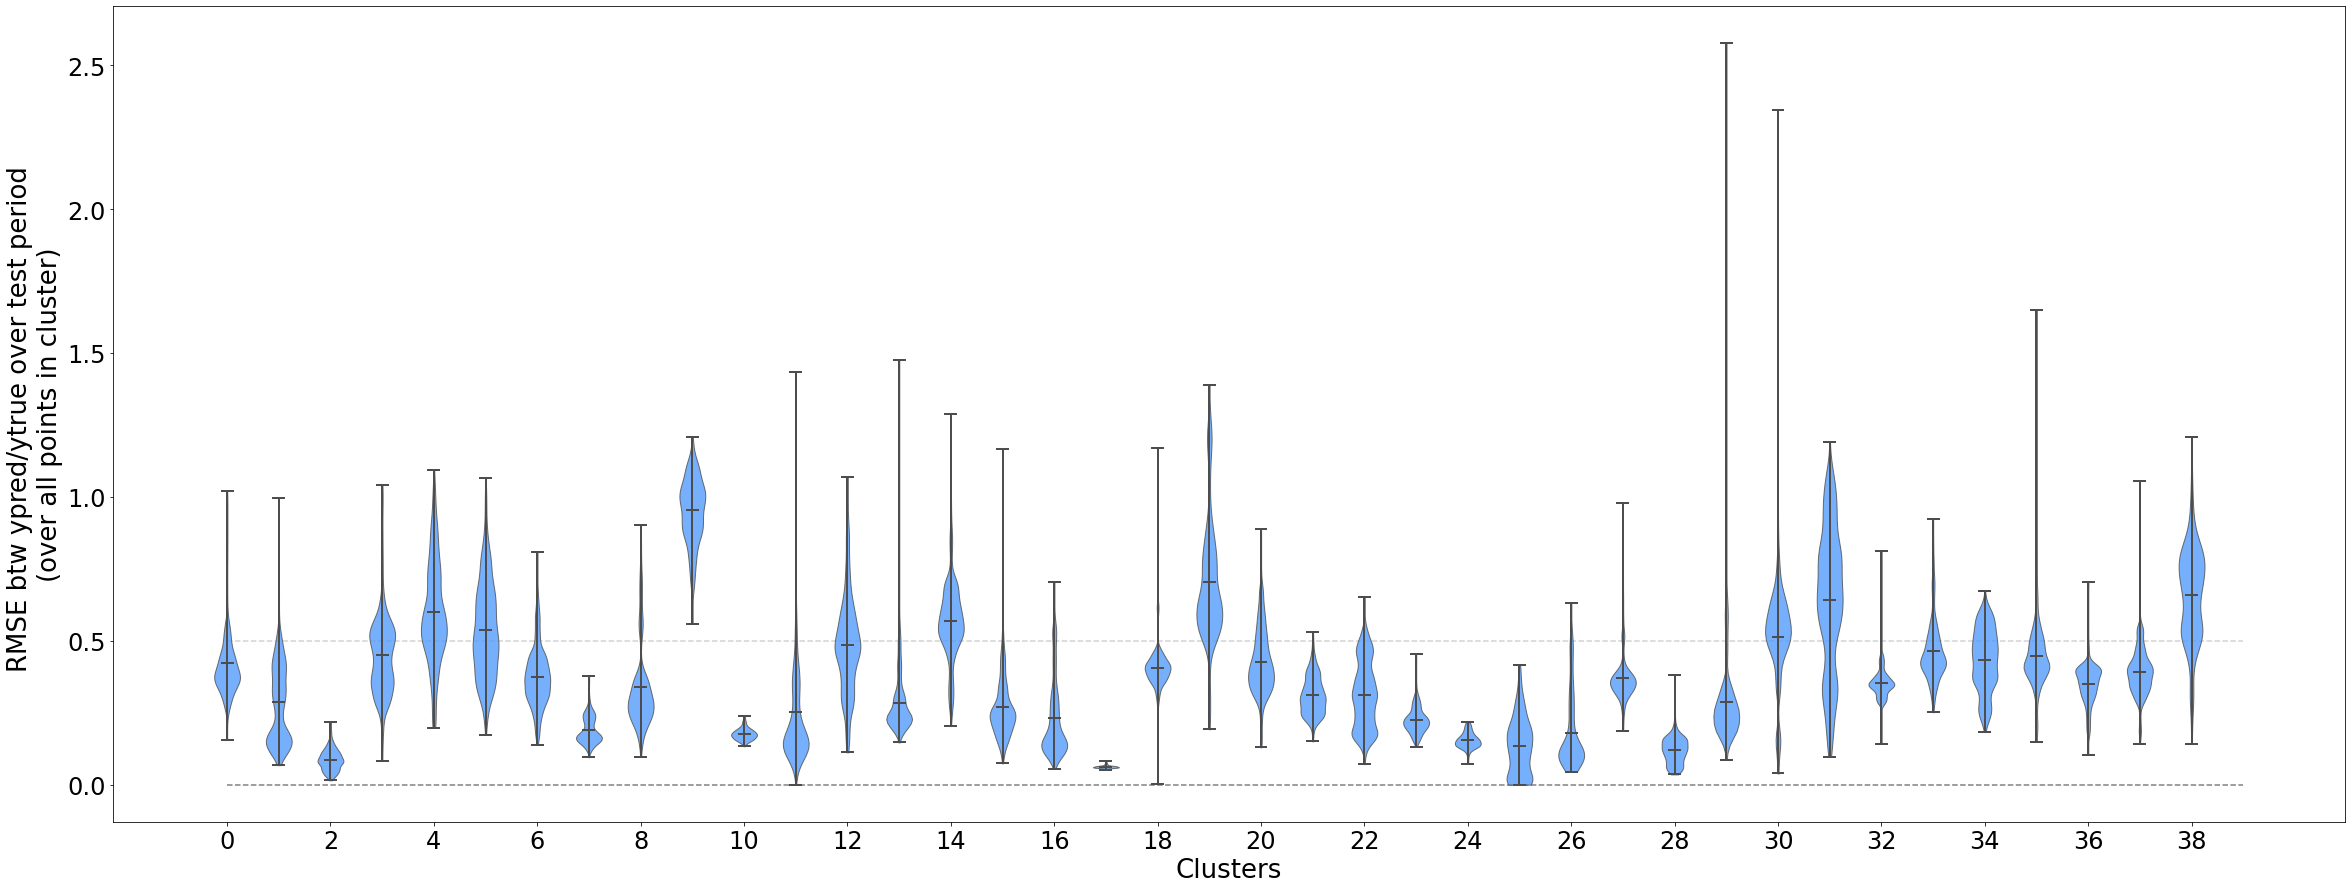

In [195]:

# def draw_violins_rmse():

fig, ax = plt.subplots(figsize=(40,15))

violons_parts = {}

for d_idx in range(max_clusters):
    violons_parts[d_idx] = plt.violinplot(dico_violon_rmse[d_idx], [int(d_idx)], showmedians=False, showmeans=True)
    
    
# plt.hlines(0, 0, max_clusters, ls='--',color='grey', zorder=-10)
plt.hlines(.5, 0, max_clusters, ls='--',color='lightgrey', zorder=-10)
# plt.hlines(-.4, 0, max_clusters, ls='--',color='lightgrey', zorder=-10)

ax.set_xlabel('Clusters')
ax.set_ylabel('RMSE btw ypred/ytrue over test period \n(over all points in cluster)')

ax.set_xticks(np.arange(0, max_clusters, 2))

orange = '#F2684C'
blue = '#549DFC'  # '#2F2079' # '#674BF1'  # #4BD6F1'  # 09306B'
grey = '#4D4D4D'

# modify colors of violons
for d_idx in range(max_clusters):
    for partname in ('cbars','cmins','cmaxes','cmeans'):
        vp = violons_parts[d_idx][partname]
        vp.set_edgecolor(grey)
        vp.set_linewidth(2)
    for vp in violons_parts[d_idx]['bodies']:
        vp.set_facecolor(blue)
        vp.set_edgecolor(grey)
       # vp.set_linewidth(1)
        vp.set_alpha(.8)
        
        
modif_plot.resize(fig, s=24, rx=0)


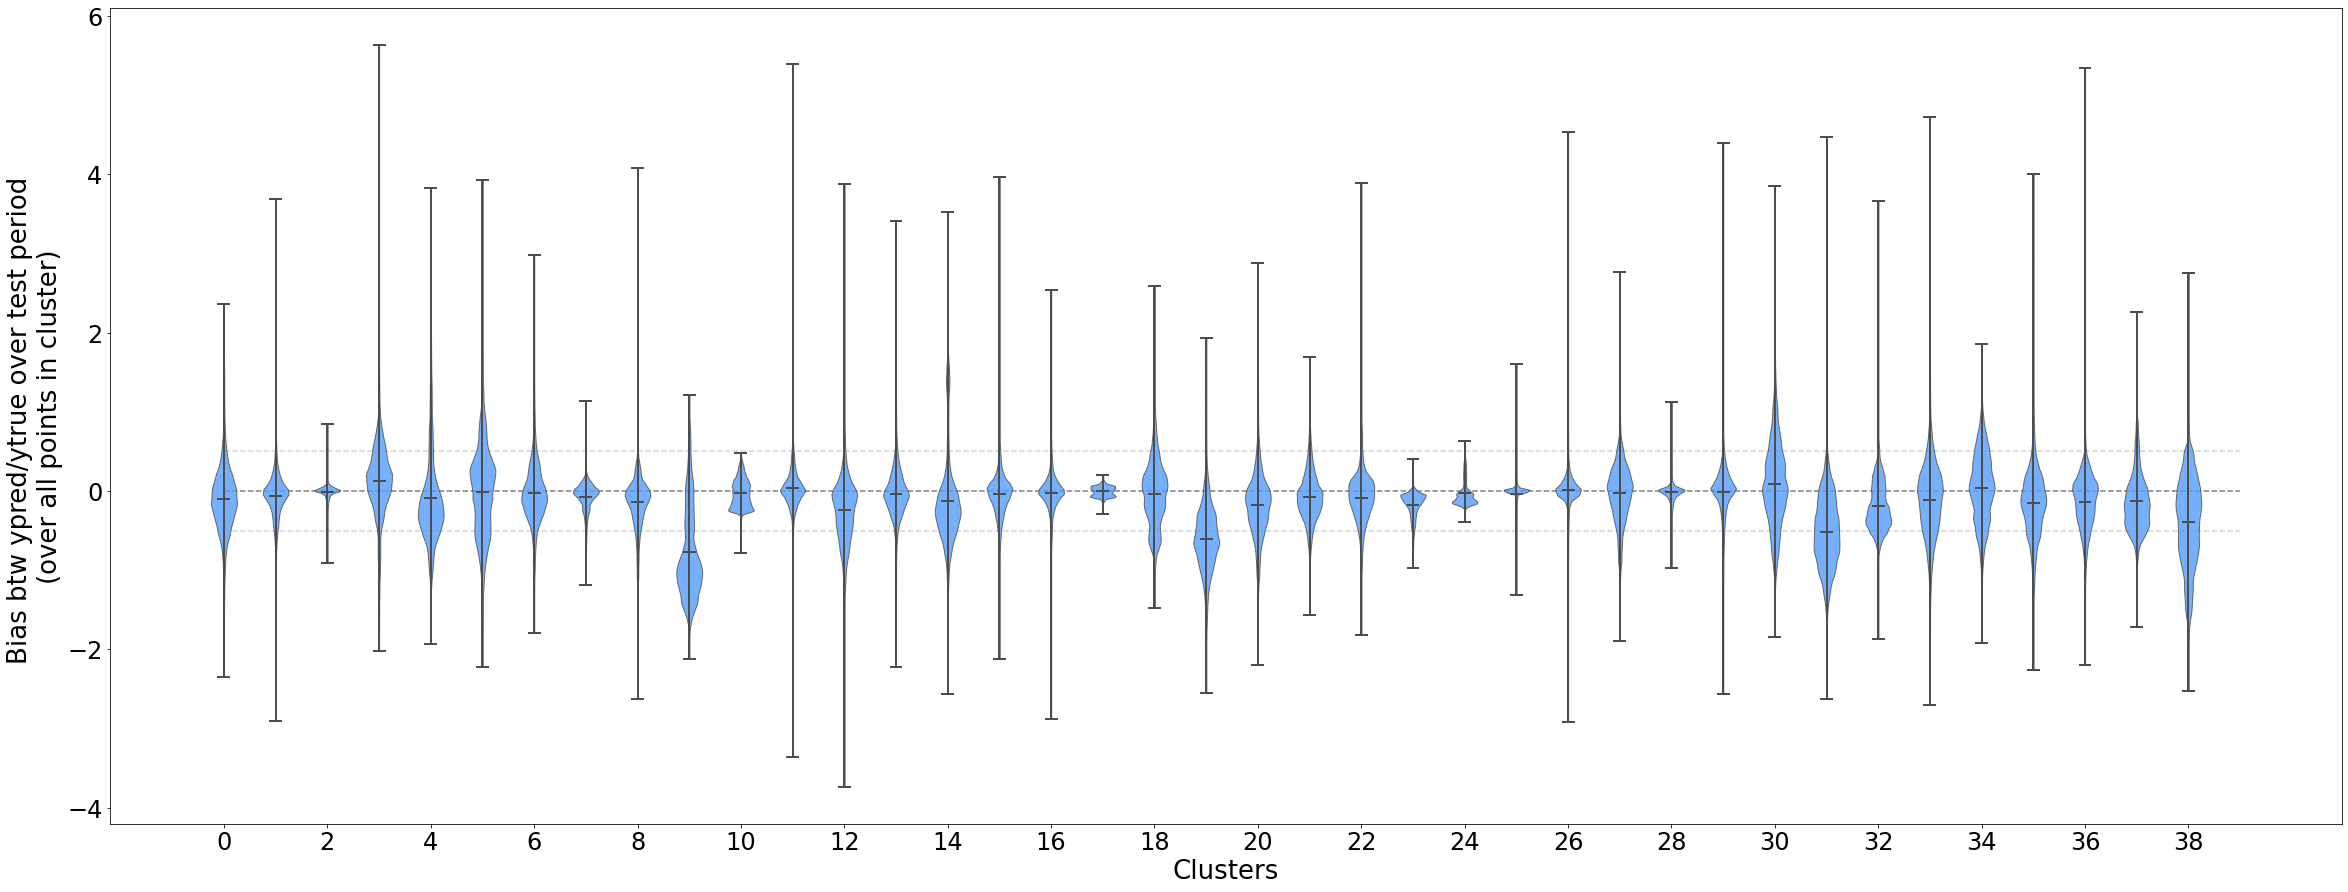

In [200]:

# def draw_violins_bias():

fig, ax = plt.subplots(figsize=(40,15))

violons_parts = {}

for d_idx in range(max_clusters):
    violons_parts[d_idx] = plt.violinplot(dico_violon_bias[d_idx], [int(d_idx)], showmedians=False, showmeans=True)
    
    
plt.hlines(0, 0, max_clusters, ls='--',color='grey', zorder=-10)
plt.hlines(.5, 0, max_clusters, ls='--',color='lightgrey', zorder=-10)
plt.hlines(-.5, 0, max_clusters, ls='--',color='lightgrey', zorder=-10)

ax.set_xlabel('Clusters')
ax.set_ylabel('Bias btw ypred/ytrue over test period \n(over all points in cluster)')

ax.set_xticks(np.arange(0, max_clusters, 2))

orange = '#F2684C'
blue = '#549DFC'  # '#2F2079' # '#674BF1'  # #4BD6F1'  # 09306B'
grey = '#4D4D4D'

# modify colors of violons
for d_idx in range(max_clusters):
    for partname in ('cbars','cmins','cmaxes','cmeans'):
        vp = violons_parts[d_idx][partname]
        vp.set_edgecolor(grey)
        vp.set_linewidth(2)
    for vp in violons_parts[d_idx]['bodies']:
        vp.set_facecolor(blue)
        vp.set_edgecolor(grey)
       # vp.set_linewidth(1)
        vp.set_alpha(.8)
        
        
modif_plot.resize(fig, s=24, rx=0)


In [21]:
# ---------------------------------------
#         Global prediction
# ---------------------------------------

# filename = f'{rootdir}Leo/results/rf_221216-141433/ml/sit_ml_2011_2019.nc'
# filename = f'{rootdir}Leo/results/ak_221216-141433/ml/sit_ml_2011_2019.nc'
filename = f'{rootdir}Leo/results/ak_230215-144514/ml/sit_gAK_2011_2019_01.nc'


nc = nc4.Dataset(f'{filename}', mode='r')
y_gpred = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['sit_ml']

sit_na = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['sit_na']

In [ ]:
# Cap negative value at 0 m (while keeping nan)
sit_mlg = (y_gpred.where((0<y_gpred), 0)).where(np.isfinite(y_gpred))

In [ ]:
# Getting SIT from SIT bias

sit_local = sit_na + ypred #  + y_gpred

In [ ]:
# sit_lc = sit_na + y_gpred - sit_a - ypred
# sit_lc = y_gpred + ypred
sit_lc2 = sit_mlg + ypred*10

In [ ]:
sit_tp4b = y_gpred - ytrue  # yes

In [ ]:
ypred.isel(time=200).plot()

local corrected SIT


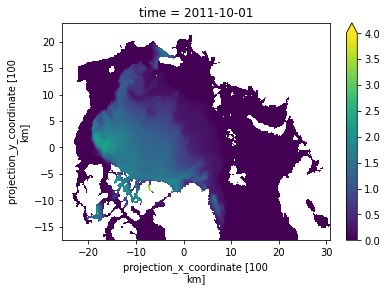

In [35]:
(sit_local.isel(time=0)).plot(vmin=0, vmax=4)
print('local corrected SIT')

local corrected SIT


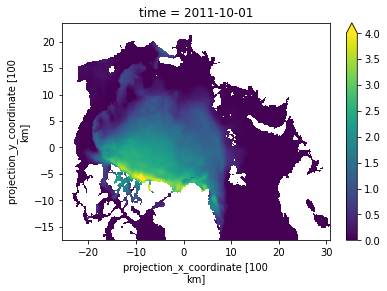

In [18]:
(sit_lc2.isel(time=0)).plot(vmin=0, vmax=4)
print('local corrected SIT')

In [19]:
(sit_a.isel(time=0)).plot(vmin=0, vmax=4)
print('local corrected SIT')

NameError: name 'sit_a' is not defined

local corrected SIT


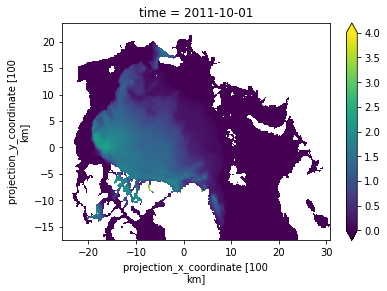

In [20]:
(sit_na.isel(time=0)-ypred.isel(time=0)).plot(vmin=0, vmax=4)
print('local corrected SIT')

In [35]:
# ---------------------------------------
#                 Cluster
# ---------------------------------------
# import Kmean group results

n_clusters = 40  #10

# idir = '/nird/projects/nird/NS2993K/Leo/results/xgb_230118-135014/ml/'
idir = f'{rootdir}Leo/results/kmean/'
ifile = f'Kmean_n{n_clusters}_2011_2019.nc'


nc = nc4.Dataset(f'{idir}{ifile}', mode='r')
km = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['km']
corr = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['corr']

In [21]:
import datetime
from src.utils import modif_plot
from src.utils import save_name

In [22]:
import pandas as pd

chrono = pd.DataFrame({'date':pd.to_datetime(ypred['time'].to_numpy())})

chrono_dt = np.array([dt.date() for dt in chrono.date])

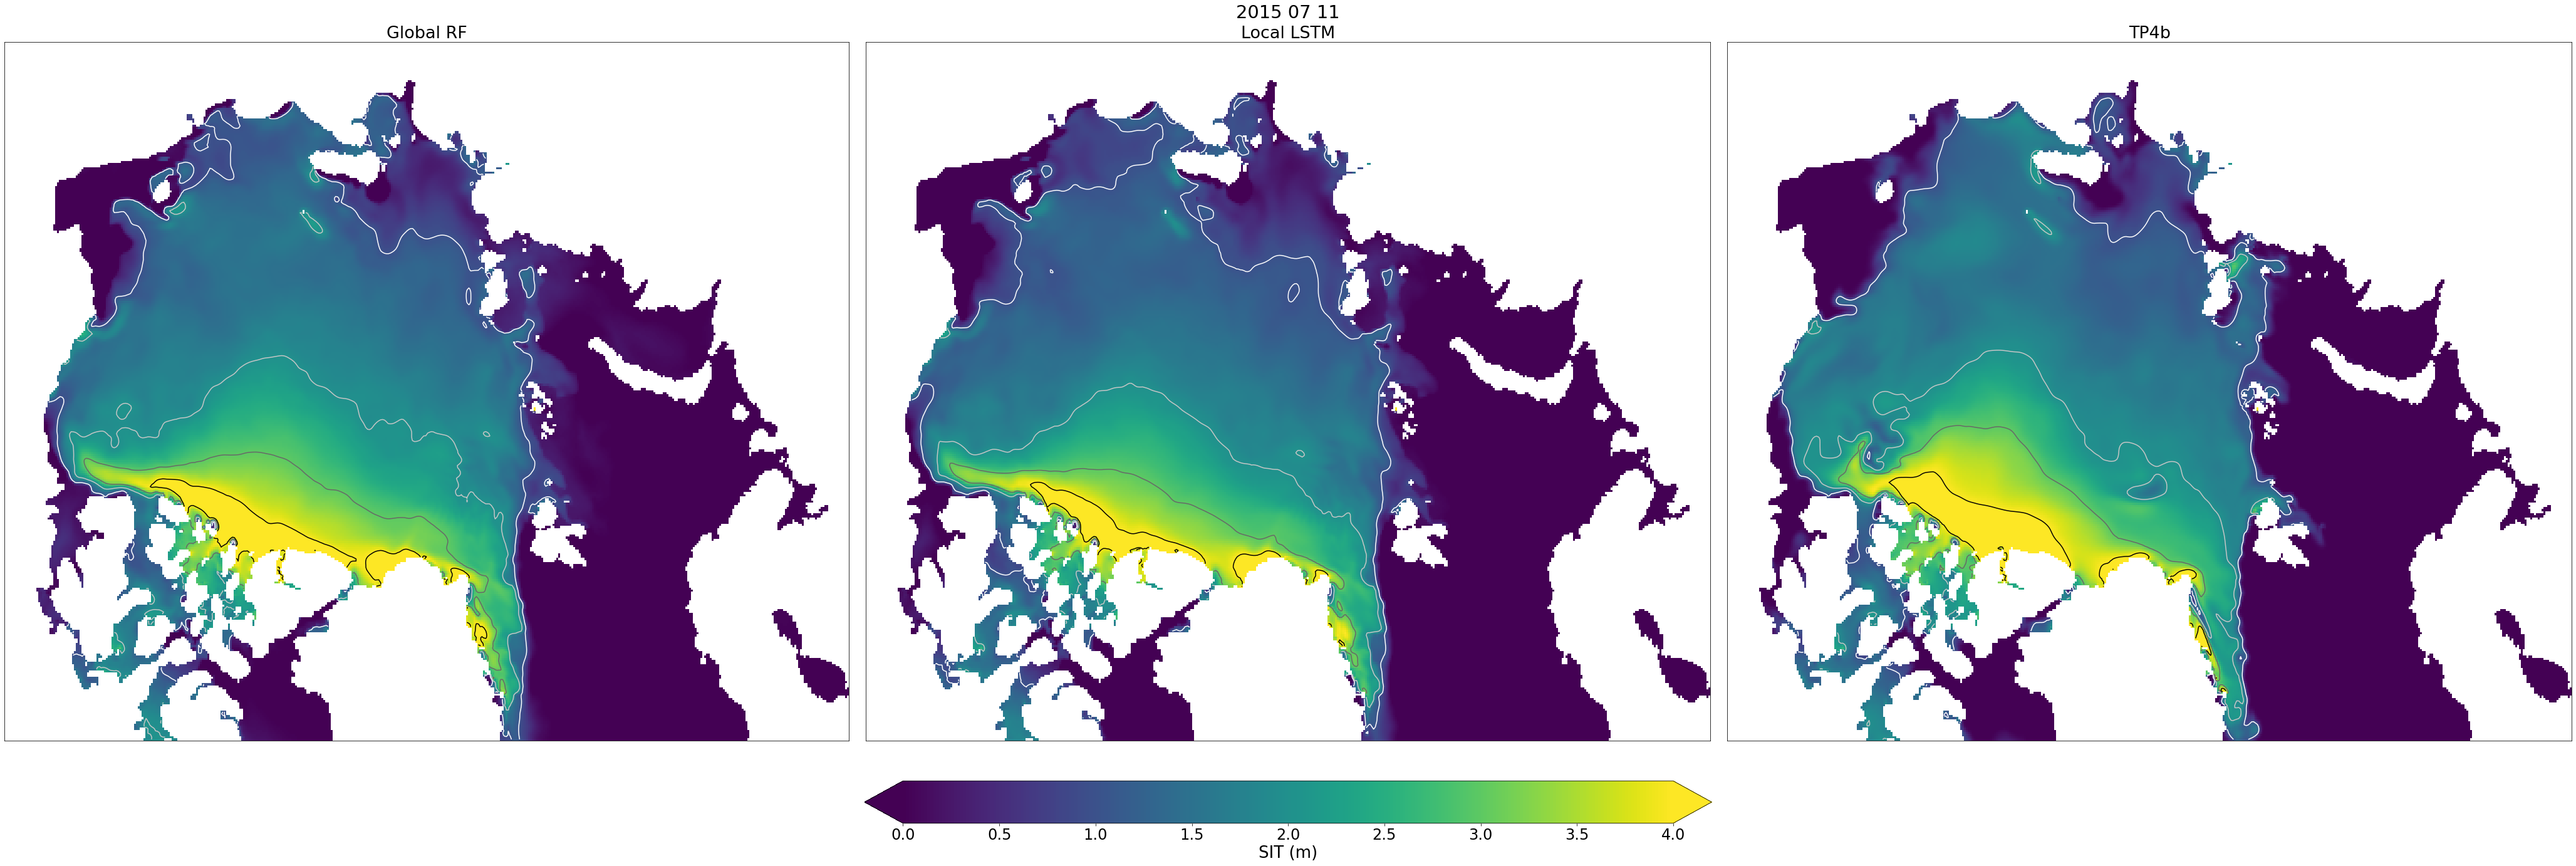

In [36]:
day = datetime.datetime(2015,7,11)
# draw_SIT_GLT(y_gpred, sit_local, sit_tp4b, day=day, chrono_dt=chrono_dt)
# draw_SIT_GLT(sit_mlg, sit_lc, sit_tp4b, day=day, chrono_dt=chrono_dt)  # , clusters=km)
draw_SIT_GLT(sit_mlg, sit_lc2, sit_tp4b, day=day, chrono_dt=chrono_dt)  # , clusters=km)

# Checking how good it actually performs

In [214]:
# plot all days

d1 = datetime.datetime(2011,10,1)
# d2 = datetime.datetime(2011,10,3)
d2 = datetime.datetime(2013,5,1)

all_days = np.array([d1 + datetime.timedelta(days=x) for x in range((d2-d1).days + 1)])

odir = f'{rootdir}Leo/results/local_prediction/SIT_GLT/'

In [215]:
draw_SIT_GLT_alldays(sit_mlg, sit_lc, sit_tp4b, days=all_days, chrono_dt=chrono_dt, odir=odir)

Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20111004.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20111005.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20111006.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20111007.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20111008.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20111009.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20111010.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20111011.png
Saved as: /scratch/project_465000269/edelleo1/Leo/result

Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20111210.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20111211.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20111212.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20111213.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20111214.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20111215.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20111216.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20111217.png
Saved as: /scratch/project_465000269/edelleo1/Leo/result

Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120218.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120219.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120220.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120221.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120222.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120223.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120224.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120225.png
Saved as: /scratch/project_465000269/edelleo1/Leo/result

Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120428.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120429.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120430.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120501.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120502.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120503.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120504.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120505.png
Saved as: /scratch/project_465000269/edelleo1/Leo/result

Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120707.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120708.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120709.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120710.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120711.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120712.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120713.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120714.png
Saved as: /scratch/project_465000269/edelleo1/Leo/result

Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120915.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120916.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120917.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120918.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120919.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120920.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120921.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20120922.png
Saved as: /scratch/project_465000269/edelleo1/Leo/result

Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20121124.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20121125.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20121126.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20121127.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20121128.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20121129.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20121130.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/local_prediction/SIT_GLT/SIT_global_local_TP4b_20121201.png
Saved as: /scratch/project_465000269/edelleo1/Leo/result

Traceback (most recent call last):
  File "/LUMI_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_96301/1197582735.py", line 1, in <cell line: 1>
    draw_SIT_GLT_alldays(sit_mlg, sit_lc, sit_tp4b, days=all_days, chrono_dt=chrono_dt, odir=odir)
  File "/tmp/ipykernel_96301/192213934.py", line 5, in draw_SIT_GLT_alldays
    draw_SIT_GLT(gl, lc, tr, day=day, chrono_dt=chrono_dt, savefig=True, showfig=False, odir=odir, contour=contour, clusters=clusters)
  File "/tmp/ipykernel_96301/3269493200.py", line 61, in draw_SIT_GLT
    plt.savefig(f"{odir}{ofile}")
  File "/LUMI_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/matplotlib/pyplot.py", line 977, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/LUMI_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/matplotlib/figure.py", line 3058, in savefig
    self.canvas.print_fi

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/LUMI_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/IPython/core/events.py", line 89, in trigger
    func(*args, **kwargs)
  File "/LUMI_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/matplotlib/pyplot.py", line 137, in post_execute
    draw_all()
  File "/LUMI_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/matplotlib/_pylab_helpers.py", line 141, in draw_all
    manager.canvas.draw_idle()
  File "/LUMI_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 2060, in draw_idle
    self.draw(*args, **kwargs)
  File "/LUMI_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py", line 436, in draw
    self.figure.draw(self.renderer)
  File "/LUMI_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/matplotlib/artist.py", line 74, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "/LUMI_CONTAINER/miniconda/env

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/LUMI_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/IPython/core/formatters.py", line 222, in catch_format_error
    r = method(self, *args, **kwargs)
  File "/LUMI_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/IPython/core/formatters.py", line 339, in __call__
    return printer(obj)
  File "/LUMI_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/IPython/core/pylabtools.py", line 151, in print_figure
    fig.canvas.print_figure(bytes_io, **kw)
  File "/LUMI_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 2295, in print_figure
    self.figure.draw(renderer)
  File "/LUMI_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/matplotlib/artist.py", line 74, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "/LUMI_CONTAINER/miniconda/envs/env1/lib/python3.9/site-packages/matplotlib/artist.py", line 51, in draw_wrapper
    return draw(artist,

<Figure size 4104x1368 with 4 Axes>

In [25]:
def draw_SIT_GLT_alldays(gl, lc, tr, days, chrono_dt, odir='', contour=True, clusters=None):
    '''Loop over all days
    '''
    for day in days:
        draw_SIT_GLT(gl, lc, tr, day=day, chrono_dt=chrono_dt, savefig=True, showfig=False, odir=odir, contour=contour, clusters=clusters) 
    

In [24]:
def draw_SIT_GLT(gl, lc, tr, day, chrono_dt, savefig=False, showfig=True, odir='', contour=True, clusters=None):
    '''draw Global Local Truth
              ML     ML   TP4b

    Parameters:
    -----------
        gl              : SIT corrected global
        lc              : SIT corrected local
        tr              : SIT from TOPAZ4b
        day             : datetime.datetime() object, date of the day to plot
        chrono_dt       : array of datetime.date() 
        contour         : bool, if true, will plot contour for SIT (1,2,3,4 meters)
        clusters        : xarray.DataArray containing the clusters (kmean)
                          default = None, will be plot if given
    '''
    
    
    
    # identify index to plot
    idx = np.where(chrono_dt==day.date())[0]
    
    
    fig, axes = plt.subplots(ncols=3, figsize=(19*3,19), constrained_layout=True)
    
    
    
    imC = gl.isel(time=idx).plot(ax=axes[0], vmin=0, vmax=4, add_colorbar=False)
    lc.isel(time=idx).plot(ax=axes[1], vmin=0, vmax=4, add_colorbar=False)
    tr.isel(time=idx).plot(ax=axes[2], vmin=0, vmax=4, add_colorbar=False)
    
    
    if contour:
        levels = np.arange(1, 5, 1)
        cl = gl.isel(time=idx[0]).plot.contour(ax=axes[0], levels=levels, vmin=0, vmax=4, add_colorbar=False, cmap=plt.get_cmap('Greys'))
        cl = lc.isel(time=idx[0]).plot.contour(ax=axes[1], levels=levels, vmin=0, vmax=4, add_colorbar=False, cmap=plt.get_cmap('Greys'), zorder=100)
        cl = tr.isel(time=idx[0]).plot.contour(ax=axes[2], levels=levels, vmin=0, vmax=4, add_colorbar=False, cmap=plt.get_cmap('Greys'))
    
    if clusters is not None:
        clusters.plot.contour(ax=axes[1], levels=np.arange(0,clusters.max()), alpha=.1, cmap=plt.cm.get_cmap('Oranges'), zorder=10)
    
    axes[0].set_title('Global RF')
    axes[1].set_title('Local LSTM')
    axes[2].set_title('TP4b')
    
    for ax in axes:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
    
    
    fig.colorbar(imC, ax=axes, label='SIT (m)', extend='both', shrink=0.33, location="bottom")
    fig.suptitle(f'{chrono_dt[idx][0].strftime("%Y %m %d")}')
    modif_plot.resize(fig, s=24, rx=0)

    
    
    if savefig:
        sdate = chrono_dt[idx][0].strftime("%Y%m%d")
        ofile = f'SIT_global_local_TP4b_{sdate}.png'
        ofile = save_name.check(f"{odir}", ofile)
        plt.savefig(f"{odir}{ofile}")
        print(f'Saved as: {odir}{ofile}')

    if showfig:
        plt.show()

    plt.close()
    

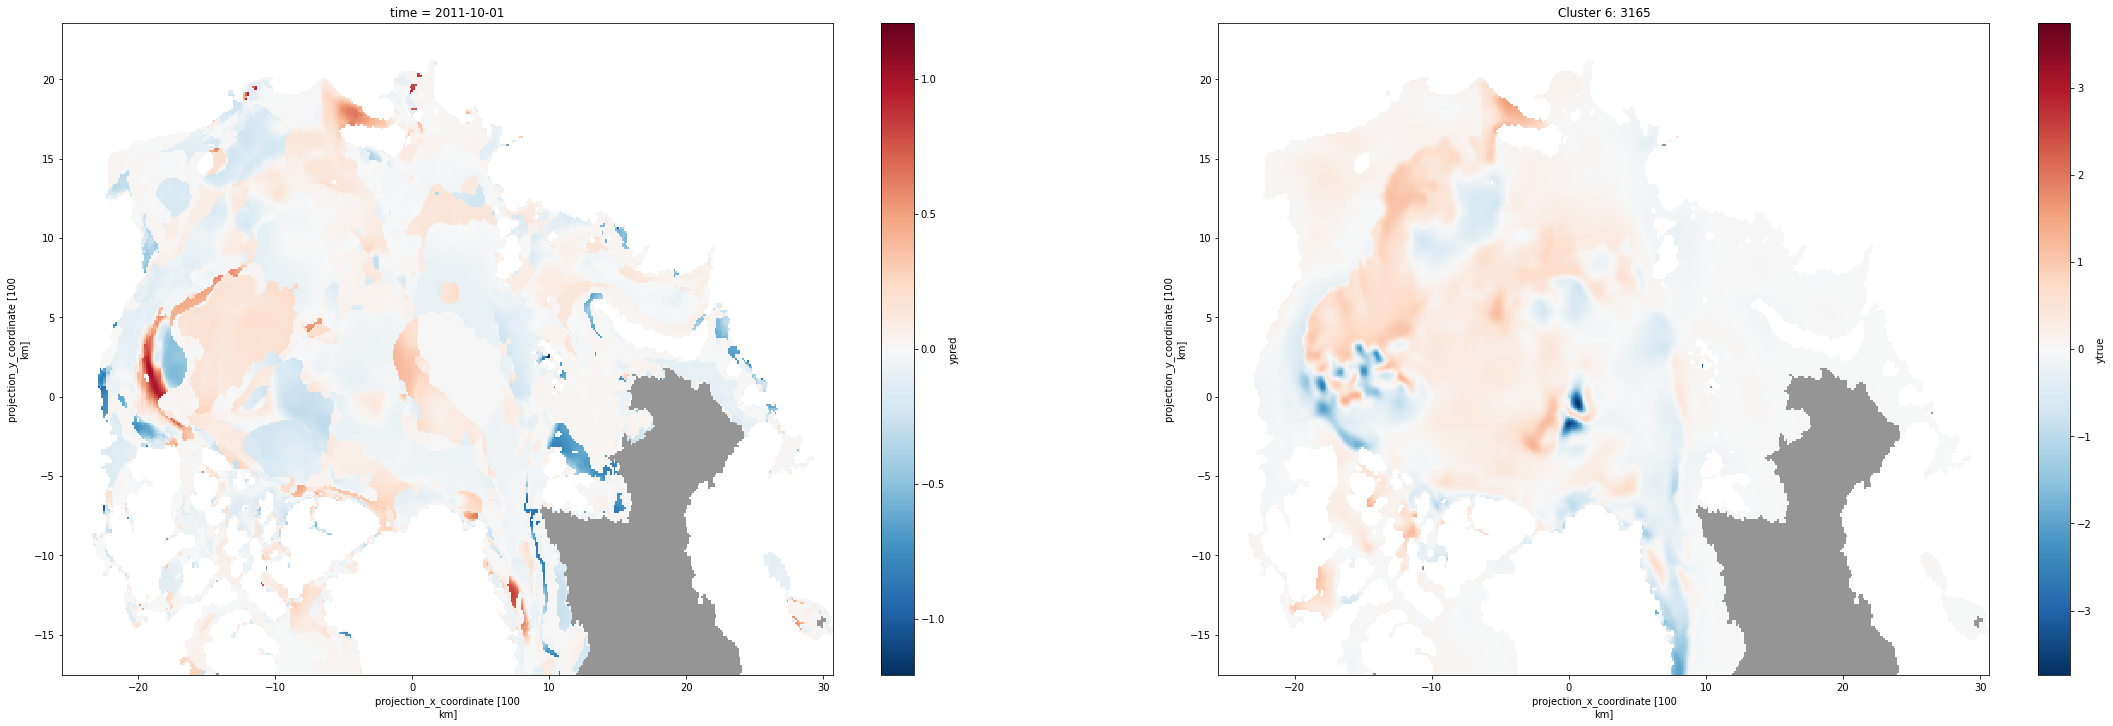

In [7]:
plot_1cluster(6, km, ypred, ytrue)

In [6]:
# plot ypred and ytrue (for 1 cluster for now)

def plot_1cluster(n, km, ypred, ytrue, points=[], savefig=False, showfig=True, odir=''):
    """ Plot a given cluster [0-max] on a map
    
    Parameters:
    -----------
        n       : int, number of the cluster to draw
        km      : K mean, DataArray 2D (y,x) containing Kmean groups
        points  : list of (y,x) points to draw on the map
    
    """
    fig, axes = plt.subplots(ncols=2, figsize=(19*2,12))

    km.where(km == -999).plot(ax=axes[0], cmap=plt.cm.Greys, add_colorbar=False)
    km.where(km > -1).plot(ax=axes[0], vmin=-2, vmax=-2, cmap=plt.cm.Blues, add_colorbar=False)
    km.where(km == n).plot(ax=axes[0], add_colorbar=False, cmap=plt.cm.Reds)
    
    ypred.isel(time=0).where(ypred.isel(time=0)!=0).plot(ax=axes[0])
    
    
    
    
    km.where(km == -999).plot(ax=axes[1], cmap=plt.cm.Greys, add_colorbar=False)
    km.where(km > -1).plot(ax=axes[1], vmin=-2, vmax=-2, cmap=plt.cm.Blues, add_colorbar=False)
    km.where(km == n).plot(ax=axes[1], add_colorbar=False, cmap=plt.cm.Reds)
    
    ytrue.isel(time=0).where(ytrue.isel(time=0)!=0).plot(ax=axes[1])
    
    
    
    
    
    
    
    
    
    
    
    
    
    

    nb_pts = np.count_nonzero(np.array(km) == n)
    plt.title(f'Cluster {n}: {nb_pts}')

    if len(points):
        markers = ['+'] + ['.'] * int(len(points)-1)
        for idx, point in enumerate(points):
            ax.scatter(km.x.data[point[1]], km.y.data[point[0]], marker=markers[idx], color='#4BD6F1', 
                    s=800, linewidths=6)  # , alpha=0.3)
    
    if savefig:
        ofile = f'Kmean_cluster{n}.png'
        ofile = save_name.check(f"{odir}", ofile)
        plt.savefig(f"{odir}{ofile}")
        print(f'Saved as: {odir}{ofile}')

    if showfig:
        plt.show()

    plt.close()



